# Taffic Sign Classification

Traffic Sign Classification Using **Convolutional Neural Networks(CNNs)**, Which is widely used in various applications in the field of Artificial Intelligence. This notebook focuses on developing a deep learning model in order to classify the traffic signs.🛑❌🚫🚷🚳

![taffic_signs](https://www.nevron.com/NIMG.axd?i=Diagram/Shapes/TrafficSignsShapes/Traffic_signs_shapes.png)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/data/input'):
     for filename in filenames:
         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
# !ls -l /kaggle/input/traffic-signs-classification

## Importing Libraries

In [2]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from tensorflow.keras.utils import plot_model

# Splitting data
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report

# Deep Learning
import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger


from collections import defaultdict

TensoFlow Version:  2.13.0-rc0


## Reading Data of Class Labels

In [3]:
# Define absolute path to your data
absolute_path = '/Users/diegogaray/calpolyCS/csc429/ml_project/data/input/aiua120214-0/frameAnnotations-DataLog02142012_external_camera.avi_annotations'

# Read label information
lab = pd.read_csv(os.path.join(absolute_path, 'frameAnnotations.csv'))


## Visualizing countplot of the classes

{'stop': 88, 'signalAhead': 59, 'pedestrianCrossing': 69, 'speedLimit': 91, 'school': 4, 'rightLaneMustTurn': 28, 'leftTurn': 22, 'laneEnds': 31, 'keepRight': 28}


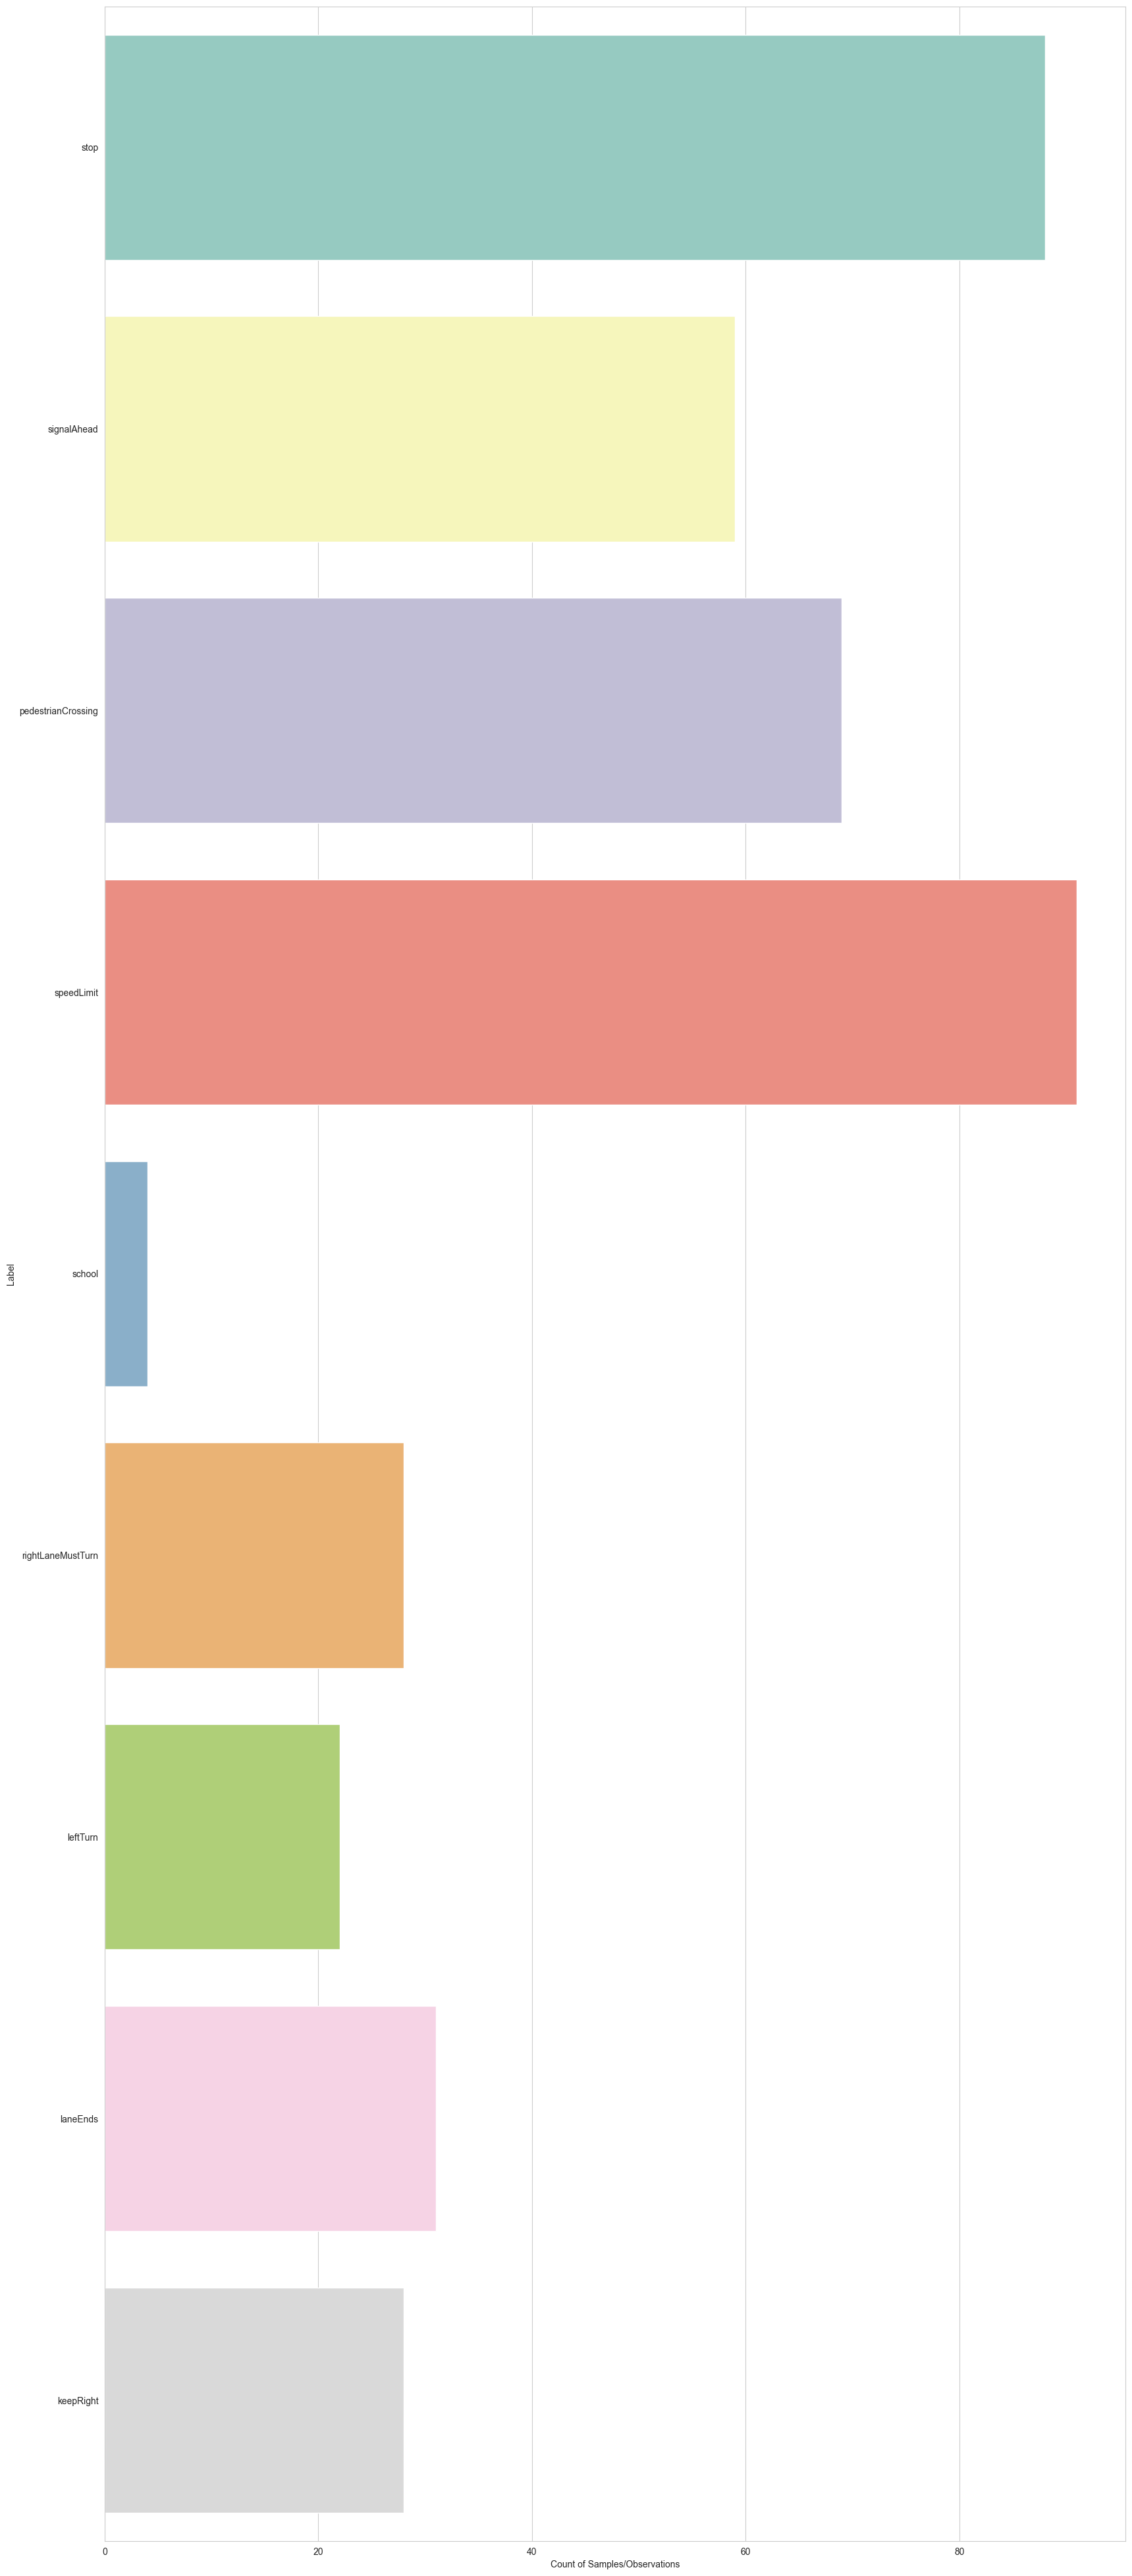

In [4]:
# Initialize a defaultdict to hold the counts. A defaultdict is used so that
# keys that are not currently in the dictionary default to a value of 0.
counts = defaultdict(int)

path = '/Users/diegogaray/calpolyCS/csc429/ml_project/data/input/aiua120214-0/frameAnnotations-DataLog02142012_external_camera.avi_annotations'

# Iterate over the files in the directory
for filename in os.listdir(path):
    # Check if the file is an image (ends with .png)
    if filename.endswith('.png'):
        # The class label is the part of the filename before the first underscore
        class_label = filename.split('_')[0]
        # Increment the count for this class label
        counts[class_label] += 1

# Convert the counts to a regular dictionary and print it
d = dict(counts)
print(d)



# Create the plot
plt.figure(figsize=(20, 50))
sns.barplot(y=list(d.keys()), x=list(d.values()), palette='Set3')
plt.ylabel('Label')
plt.xlabel('Count of Samples/Observations')
plt.show()

## Reading Image Data

In [5]:
# Initialize list to hold the data
data = []

# Iterate over the files in the directory
for filename in os.listdir(path):
    # Check if the file is an image (ends with .png)
    if filename.endswith('.png'):
        # The class label is the part of the filename before the first underscore
        class_label = filename.split('_')[0]
        # Append the filename and class label to the data
        data.append([filename, class_label])

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=['filename', 'class'])

# nb_classes = df['class'].nunique()

datagen = ImageDataGenerator(rescale=1./255., validation_split=0.25)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=path,
    x_col="filename",
    y_col="class",
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(32,32))

valid_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=path,
    x_col="filename",
    y_col="class",
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(32,32))

Found 315 validated image filenames belonging to 9 classes.
Found 105 validated image filenames belonging to 9 classes.


In [6]:
X, y = train_generator.next()
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

Data Shape   :(32, 32, 32, 3)
Labels shape :(32, 9)


## Sample Images of Dataset

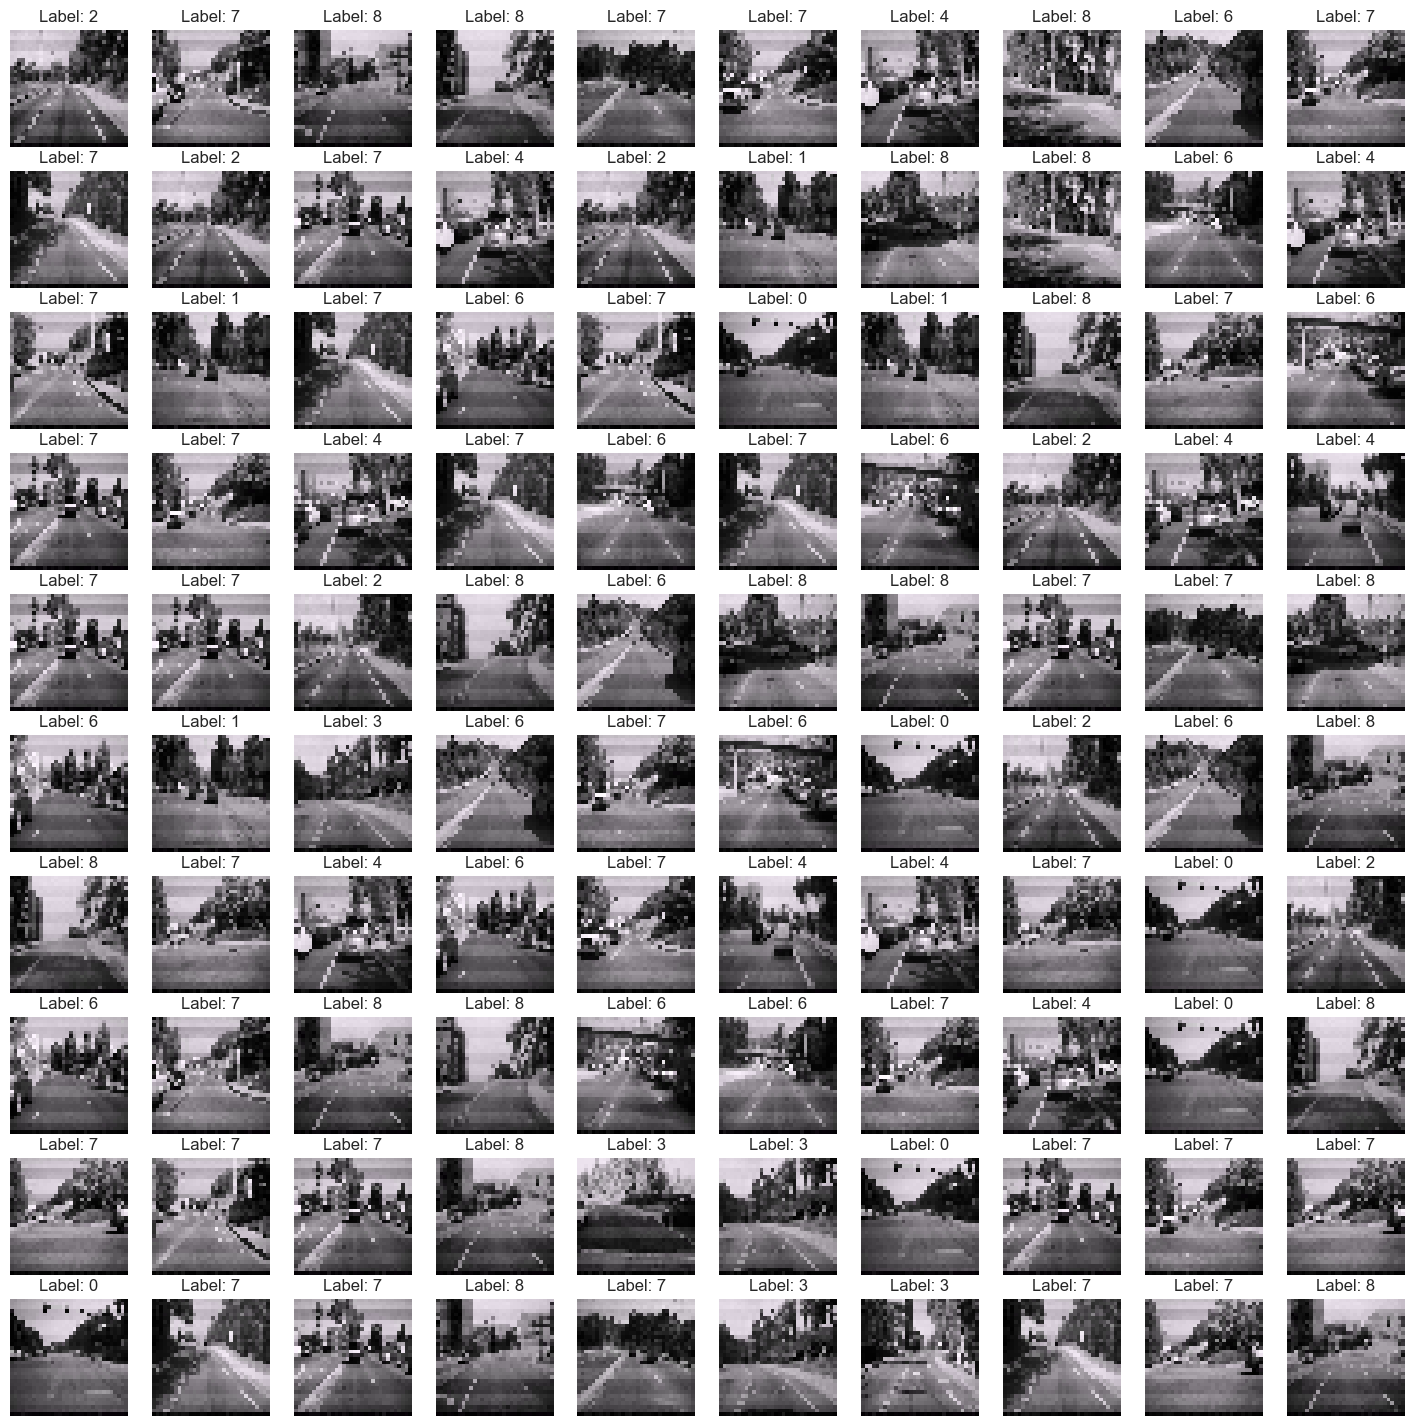

In [7]:

# Get one batch of images and their corresponding labels
X_batch, y_batch = next(train_generator)
fig, axes = plt.subplots(10, 10, figsize=(18, 18))

for i, ax in enumerate(axes.flat):
    # Draw a random image from the batch
    r = np.random.randint(X_batch.shape[0])
    image = X_batch[r]
    
    ax.imshow(image, interpolation='nearest')
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Label: '+str(np.argmax(y_batch[r])))

plt.show()


## Dividing data into **train** and **test** in the split percentage of 80:20

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [9]:
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))

Train Shape: (25, 32, 32, 3)
Test Shape : (7, 32, 32, 3)


## Customising ResNet50 model  

In [10]:
img_rows = 32
img_cols = 32
img_channels = 3

resnet = ResNet50(weights= None, include_top=False, input_shape= (img_rows,img_cols,img_channels))

NameError: name 'img_rows' is not defined

In [ ]:
nb_classes = len(train_generator.class_indices)

In [ ]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(nb_classes, activation= 'softmax')(x)
model = Model(inputs = resnet.input, outputs = predictions)

In [ ]:
model.summary()

## Visualising Model Architecture

In [ ]:
plot_model(model, show_layer_names=True, show_shapes =True, to_file='model.png', dpi=350)

## Compiling the Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Creating Callbacks

In [ ]:
model_check = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

csv_logger = CSVLogger('train_log.csv', separator=',')


## Fitting Model with Data

In [ ]:
n_epochs = 100
history = model.fit_generator(train_generator, epochs=n_epochs, validation_data=valid_generator, callbacks = [model_check, early, reduce_lr, csv_logger])


In [ ]:
# Saving the model
model.save("test_model.keras")

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)

In [ ]:
q = len(list(history.history['loss']))
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Accuracy')
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Loss')
plt.xlabel('#epochs')
plt.ylabel('Training')
plt.legend();

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_accuracy'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Accuracy')
plt.legend();

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_loss'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend();

## Predict class labels of the test data

In [ ]:
%%time
pred = np.argmax(model.predict(X_test), axis = 1)

## Classification Report

In [ ]:
class_labels = train_generator.class_indices
labels = [k for k, v in sorted(class_labels.items(), key=lambda item: item[1])]


## Confusion Matrix

In [ ]:
cmat = confusion_matrix(np.argmax(y_test, axis=1), pred)
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d", xticklabels=labels, yticklabels=labels);

## Classwise Accuracy

In [ ]:
# Create a DataFrame with class-wise accuracies
classwise_acc = cmat.diagonal() / cmat.sum(axis=1) * 100
class_labels = train_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}

# create a dictionary with class labels as keys and accuracies as values
accuracy_dict = {class_labels[i]: acc for i, acc in enumerate(classwise_acc)}

# Now create a DataFrame, using a default accuracy for classes not in `accuracy_dict`
cls_acc = pd.DataFrame(
    {
        'Class_Label': sorted(class_labels.values()),  # Sort the class labels
        'Accuracy': [accuracy_dict.get(label, np.nan) for label in sorted(class_labels.values())]
    },
    columns=['Class_Label', 'Accuracy']
)

# Hide the index
cls_acc_styled = cls_acc.style.set_table_styles([{'selector': 'th.row_heading', 'props': [('display', 'none')]}])

# Apply formatting and create the bar chart
cls_acc_styled.format({"Accuracy": "{:,.2f}"}).bar(subset=["Accuracy"], color='tomato')

# Display the styled DataFrame
cls_acc_styled


'\n\nclasswise_acc = cmat.diagonal() / cmat.sum(axis=1) * 100\n\nclass_labels = train_generator.class_indices\nclass_labels = {v: k for k, v in class_labels.items()}\n\n# Create a dictionary with class labels as keys and accuracies as values\naccuracy_dict = {class_labels[i]: acc for i, acc in enumerate(classwise_acc)}\n\n# Now create a DataFrame, using a default accuracy for classes not in `accuracy_dict`\ncls_acc = pd.DataFrame(\n    {\n        \'Class_Label\': sorted(class_labels.values()),  # Sort the class labels\n        \'Accuracy\': [accuracy_dict.get(label, np.nan) for label in sorted(class_labels.values())]\n    },\n    columns=[\'Class_Label\', \'Accuracy\']\n)\n\n# Hide the index\ncls_acc_styled = cls_acc.style.set_table_styles([{\'selector\': \'th.row_heading\', \'props\': [(\'display\', \'none\')]}])\n\n# Apply formatting and create the bar chart\ncls_acc_styled.format({"Accuracy": "{:,.2f}"}).bar(subset=["Accuracy"], color=\'tomato\')\n\n# Display the styled DataFrame\nc

## Finally, Lets see the predictions of **unseen data**

In [ ]:

fig, axes = plt.subplots(5, 5, figsize=(18, 18))

for i, ax in enumerate(axes.flat):
    r = np.random.randint(X_test.shape[0])
    image = X_test[r]
    label_true = np.argmax(y_test[r])
    label_pred = np.argmax(model.predict(image.reshape(1, 32, 32, 3)))
    
    # Convert the image back to the original scale (from [0, 1] to [0, 255])
    image = (image * 255).astype('uint8')
    
    ax.imshow(image)
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Original: {} Predicted: {}'.format(label_true, label_pred))

plt.show()

--- 